Copied cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\42196_right.jpeg to train\0\42196_right.jpeg
Copied cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\5948_left.jpeg to train\0\5948_left.jpeg
Copied cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\4098_left.jpeg to train\0\4098_left.jpeg
Copied cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\21273_left.jpeg to train\0\21273_left.jpeg
Copied cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\24868_left.jpeg to train\0\24868_left.jpeg
Copied cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\37675_left.jpeg to train\0\37675_left.jpeg
Copied cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\19376_left.jpeg to train\0\19376_left.jpeg
Copied c

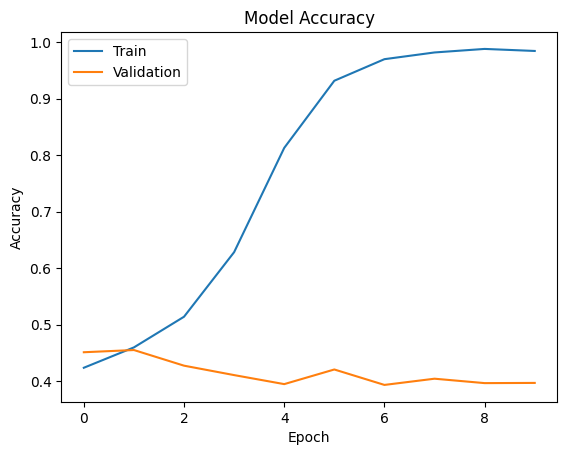

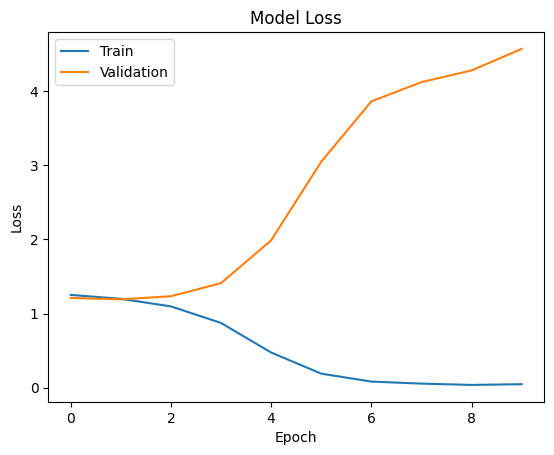

89/89 [==============================] - 15s 172ms/step


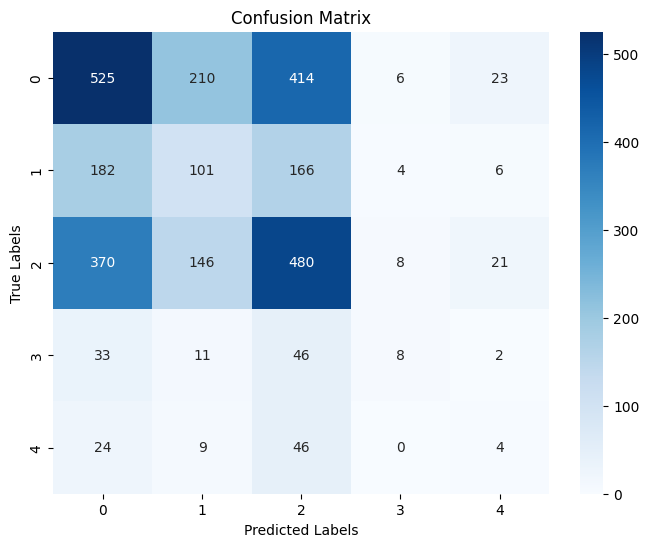

In [1]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


import os
import random
import shutil

main_folder = 'cleaned_dataset_diabetic_retinopathy\cleaned_dataset_diabetic_retinopathy\cleaned_dataset'
train_ratio = 0.8

train_dir = 'train'
test_dir = 'test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


subfolders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]


for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    all_files = os.listdir(subfolder_path)
    random.shuffle(all_files)
    
    split_index = int(len(all_files) * train_ratio)
    train_files = all_files[:split_index]
    test_files = all_files[split_index:]
    

    train_subdir = os.path.join(train_dir, subfolder)
    test_subdir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)
    

    for file in train_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(train_subdir, file)
        try:
            shutil.copy(src, dst)
            print(f"Copied {src} to {dst}")
        except Exception as e:
            print(f"Error copying {src} to {dst}: {e}")
    

    for file in test_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(test_subdir, file)
        try:
            shutil.copy(src, dst)
            print(f"Copied {src} to {dst}")
        except Exception as e:
            print(f"Error copying {src} to {dst}: {e}")

batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
test_steps = len(test_generator)
predictions = model.predict(test_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

class_names = list(train_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
